#---------- adaptformer wad used! ----------#
#---------- adaptformer wad used! ----------#
#---------- adaptformer wad used! ----------#
#---------- adaptformer wad used! ----------#
#---------- adaptformer wad used! ----------#
#---------- adaptformer wad used! ----------#
#---------- adaptformer wad used! ----------#
#---------- adaptformer wad used! ----------#
#---------- adaptformer wad used! ----------#
#---------- adaptformer wad used! ----------#
#---------- adaptformer wad used! ----------#
#---------- adaptformer wad used! ----------#


/home/ruanjiacheng/anaconda3/envs/pt180/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/ruanjiacheng/anaconda3/envs/pt180/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


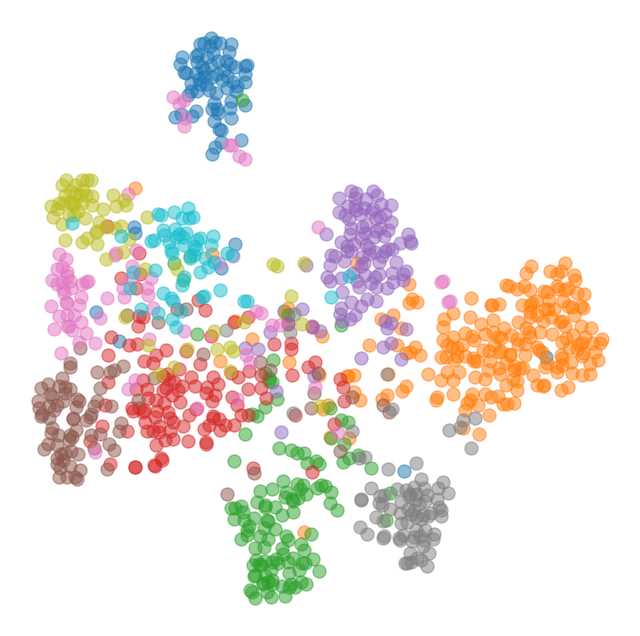

In [1]:
import torch
from models import vision_transformer
from timm.models import create_model
from data import create_loader, create_dataset

model = create_model(
        'vit_base_patch16_224_in21k',
        pretrained=False,
        num_classes=10,
        # drop_rate=args.drop,
        # drop_connect_rate=args.drop_connect,  # DEPRECATED, use drop_path
        # drop_path_rate=args.drop_path,
        # drop_block_rate=args.drop_block,
        # global_pool=args.gp,
        # bn_momentum=args.bn_momentum,
        # bn_eps=args.bn_eps,
        scriptable=True,
        checkpoint_path='/media/ruanjiacheng/新加卷/ecodes/Prompt/CV/GIST_KD/outputs/vit_base_patch16_224_in21k/vtab/svhn/adaptformer/20231221-175541-vit_base_patch16_224_in21k-224/model_best.pth.tar',
        tuning_mode='adaptformer')



dataset_eval = create_dataset(
        'svhn', root='/media/ruanjiacheng/新加卷/ecodes/Prompt/data/vtab-1k/svhn',
        split='train', is_training=True,
        class_map='',
        download=False,
        batch_size=1)

loader_eval = create_loader(
        dataset_eval,
        input_size=(3, 224, 224),
        batch_size=1,
        is_training=False,
        use_prefetcher=True,
        direct_resize=True,
        interpolation='bicubic',
        mean=(0.485, 0.456, 0.406),
        std=(0.229, 0.224, 0.225),
        num_workers=8,
        distributed=False,
        crop_pct=0.875,
        pin_memory=True,
    )

out_list = []
gist_list = []
cls_list = []
label_list = []
model.cuda().eval()
with torch.no_grad():
    for batch_idx, (input, target) in enumerate(loader_eval):
        # output, gist, CLS_TOKEN = model(input)
        output, CLS_TOKEN = model(input)
        out_list.append(output.cpu().numpy())
        # gist_list.append(gist.cpu().numpy())
        cls_list.append(CLS_TOKEN.cpu().numpy())
        label_list.append(target.cpu().numpy())

import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

label_list_ = np.hstack([i for i in label_list])

cls_tokens_reshaped = np.vstack([i for i in out_list])

# 创建并拟合t-SNE模型
tsne_model = TSNE(perplexity=30, n_components=2, init='pca', random_state=42)
new_values = tsne_model.fit_transform(cls_tokens_reshaped)


# 创建并显示散点图
plt.figure(figsize=(8, 8))

for label in np.unique(label_list_):
    ix = np.where(label_list_ == label)
    plt.scatter(new_values[ix, 0], new_values[ix, 1], label=label, alpha=0.5, s=88)
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.savefig('fig5-1.png', dpi=350, bbox_inches='tight')
plt.show()

#---------- adaptformer wad used! ----------#
#---------- adaptformer wad used! ----------#
#---------- adaptformer wad used! ----------#
#---------- adaptformer wad used! ----------#
#---------- adaptformer wad used! ----------#
#---------- adaptformer wad used! ----------#
#---------- adaptformer wad used! ----------#
#---------- adaptformer wad used! ----------#
#---------- adaptformer wad used! ----------#
#---------- adaptformer wad used! ----------#
#---------- adaptformer wad used! ----------#
#---------- adaptformer wad used! ----------#


/home/ruanjiacheng/anaconda3/envs/pt180/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/ruanjiacheng/anaconda3/envs/pt180/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


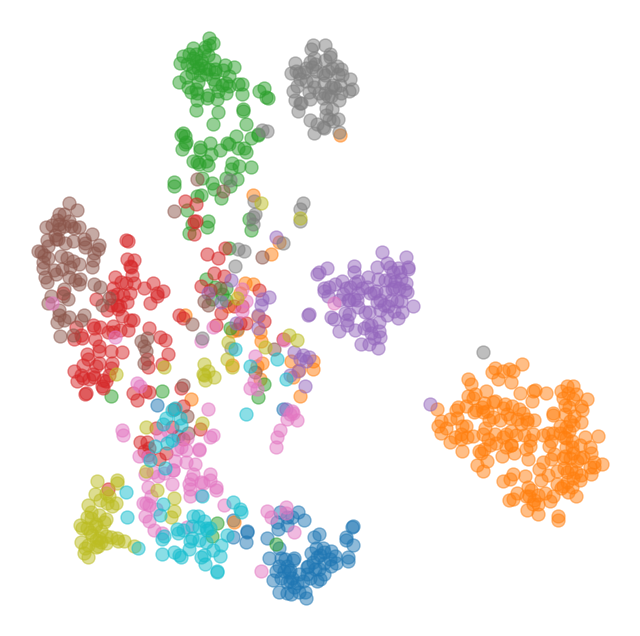

In [2]:
import torch
from models import vision_transformer
from timm.models import create_model
from data import create_loader, create_dataset

model = create_model(
        'vit_base_patch16_224_in21k',
        pretrained=False,
        num_classes=10,
        # drop_rate=args.drop,
        # drop_connect_rate=args.drop_connect,  # DEPRECATED, use drop_path
        # drop_path_rate=args.drop_path,
        # drop_block_rate=args.drop_block,
        # global_pool=args.gp,
        # bn_momentum=args.bn_momentum,
        # bn_eps=args.bn_eps,
        scriptable=True,
        checkpoint_path='/media/ruanjiacheng/新加卷/ecodes/Prompt/CV/GIST_KD/outputs2/vit_base_patch16_224_in21k/vtab/svhn/adaptformer/20231221-164748-vit_base_patch16_224_in21k-vit_small_patch16_224_in21k-224/model_best.pth.tar',
        tuning_mode='adaptformer')



dataset_eval = create_dataset(
        'svhn', root='/media/ruanjiacheng/新加卷/ecodes/Prompt/data/vtab-1k/svhn',
        split='train', is_training=True,
        class_map='',
        download=False,
        batch_size=1)

loader_eval = create_loader(
        dataset_eval,
        input_size=(3, 224, 224),
        batch_size=1,
        is_training=False,
        use_prefetcher=True,
        direct_resize=True,
        interpolation='bicubic',
        mean=(0.485, 0.456, 0.406),
        std=(0.229, 0.224, 0.225),
        num_workers=8,
        distributed=False,
        crop_pct=0.875,
        pin_memory=True,
    )

out_list = []
gist_list = []
cls_list = []
label_list = []
model.cuda().eval()
with torch.no_grad():
    for batch_idx, (input, target) in enumerate(loader_eval):
        # output, gist, CLS_TOKEN = model(input)
        output, CLS_TOKEN = model(input)
        out_list.append(output.cpu().numpy())
        # gist_list.append(gist.cpu().numpy())
        cls_list.append(CLS_TOKEN.cpu().numpy())
        label_list.append(target.cpu().numpy())

import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

label_list_ = np.hstack([i for i in label_list])

cls_tokens_reshaped = np.vstack([i for i in out_list])

# 创建并拟合t-SNE模型
tsne_model = TSNE(perplexity=30, n_components=2, init='pca', random_state=42)
new_values = tsne_model.fit_transform(cls_tokens_reshaped)


# 创建并显示散点图
plt.figure(figsize=(8, 8))

for label in np.unique(label_list_):
    ix = np.where(label_list_ == label)
    plt.scatter(new_values[ix, 0], new_values[ix, 1], label=label, alpha=0.5, s=88)
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.savefig('fig5-2.png', dpi=1000, bbox_inches='tight')
plt.show()